# 한글 자연어 처리(한글 분석)



### 1. Jpype 다운로드
- java 환경설정
    - 고급시스템 설정에서 JAVA_HOME 변수 설정, 값에 자바 경로 설정
    - path : %JAVA_HOME%\bin 추가
  
- https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
- 파이썬 버전에 맞게 다운로드(__Python 3.10.9__)
- Anaconda Prompt 에서 아래 명령어 실행
    - `pip install C:\Users\admin\Documents\JPype1-1.4.0-cp310-cp310-win_amd64.whl`
    - `pip install konlpy`
    

In [5]:
from konlpy.tag import *
Hannanum = Hannanum()
import konlpy
konlpy.__version__

'0.6.0'

### 2. 파일 불러오기

- 네이버 뉴스 기사 스크랩

In [6]:
f=open('data/news.txt',encoding='utf-8')
data=f.read()
print(data)

미국·한국 등 세계 주요국 통화당국의 기준금리 인상 사이클이 끝나간다.

한국은 4회 연속 기준금리를 동결했다. 사실상 긴축 종료 선언으로 시장은 받아들인다. 미국도 소비자물가지수(CPI)가 예상보다 빠르게 둔화하며 이달을 끝으로 기준금리 인상이 종료될 것이란 전망이 나온다.

다만 한국은 급증하는 가계부채, 미국은 여전히 뜨거운 노동시장과 국제 에너지 가격 변동성 등이 각각 변수로 지적된다.

한국은행 금융통화위원회는 13일 서울 중구 한은 본관에서 통화정책방향 회의를 열고 현행 연 3.5%인 기준금리를 동결했다. 지난 2월, 4월, 5월에 이어 4번 연속 동결이다.

한은은 지난해 4월 기준금리를 1.25%에서 1.5%로 올린 것을 시작으로 올해 1월 3.5%까지 7차례 연속 금리를 인상했다. 지난 2월 10개월 만에 금리 인상 행진을 멈춘 데 이어 이번에 4회 연속 동결을 결정했다.

금통위는 통화정책방향 결정문에서 "물가상승률이 둔화 흐름을 이어가고 있지만 8월 이후에는 다시 3% 내외로 높아지는 등 상당 기간 목표 수준을 상회할 것으로 전망된다"며 "주요국의 통화 정책, 가계부채 흐름 등도 지켜볼 필요가 있는 만큼 현재의 긴축 기조를 유지하는 것이 적절하다고 봤다"고 밝혔다.


이날 이창용 한은 총재는 기자간담회에서 "금융통화위원 6명 모두 3.75%(로의 추가 인상) 가능성을 열어둬야 한다고 말했다"며 추가 긴축 가능성을 시사했다.

그러나 시장은 금리 인상 사이클이 이미 종료됐으며 올해 4분기 또는 내년 1분기에는 금리 인하가 시작될 수 있다고 보고 있다. 소비자물가 상승률이 지난달 2%대(2.7%)로 내려오는 등 물가상승률 둔화세가 뚜렷해졌기 때문이다. 최근 수출 부진이 완화하고 있지만 올해 연간 성장률이 1%대에 머물 것으로 보이는 등 경기 둔화가 계속되는 것도 또 다른 이유다.

미국도 지난달 CPI가 시장 전망치(3.1%)보다 낮은 3.0%에 머물면서 연방준비제도이사회(Fed·연준)의 기준금리 인상 종료가 머지 않았다는 전망이 나온다. 연

### 3. 형태소 분석
- konlpy의 형태소 분석, 태깅 라이브러리
    - Hannanum : 한나눔. KAIST Semantic Web Research Center 개발
        - http://semanticweb.kaist.ac.kr/hannanum/
    - Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
        - http://kkma.snu.ac.kr/
    - Komoran: 코모란. Shineware에서 개발.
        - https://github.com/shin285/KOMORAN
    - Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
        - https://github.com/open-korean-text/open-korean-text
- 여기에서는 한나눔, 꼬꼬마, 오픈코리안텍스트 형태소만 예제로 포함하였다.

In [7]:
from konlpy.tag import *
hannanum=Hannanum()
kkma=Kkma()
komoran=Komoran()
okt=Okt()

#### 3.1. 형태소 분석기 공통적 기능
- __nouns__      : 명사 추출
- __mprphs__    : 형태 추출
- __pos__          : 형태소 추출과 품사 태깅

In [8]:
from nltk import Text
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

In [9]:
fontname='c:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=fontname).get_name()
rc('font',family=font_name)

In [10]:
from collections import Counter

In [11]:
nouns_news=okt.nouns(data)
counter=Counter(nouns_news)
counter2=dict()
for tag, count in counter.items():
    if (len(tag)>1) and (count>1):
        counter2[tag]=count

counter2

{'미국': 8,
 '한국': 5,
 '통화': 5,
 '기준금리': 11,
 '인상': 15,
 '사이클': 3,
 '연속': 4,
 '동결': 6,
 '사실': 2,
 '긴축': 3,
 '종료': 5,
 '시장': 6,
 '소비자': 2,
 '물가': 3,
 '예상': 3,
 '둔화': 4,
 '전망': 5,
 '급증': 2,
 '가계부채': 4,
 '국제': 3,
 '에너지': 3,
 '가격': 3,
 '변동성': 2,
 '변수': 2,
 '지적': 3,
 '통화정책': 2,
 '방향': 2,
 '회의': 2,
 '지난': 2,
 '시작': 2,
 '올해': 3,
 '차례': 2,
 '금리': 8,
 '개월': 2,
 '결정': 3,
 '물가상승률': 2,
 '흐름': 2,
 '어가': 2,
 '다시': 2,
 '목표': 2,
 '수준': 2,
 '정책': 2,
 '기조': 2,
 '총재': 2,
 '금융': 2,
 '위원': 2,
 '모두': 2,
 '추가': 5,
 '가능성': 6,
 '시사': 2,
 '인하': 2,
 '지난달': 4,
 '완화': 3,
 '경기': 2,
 '연방': 4,
 '준비': 2,
 '제도': 2,
 '근원': 2,
 '공개시장': 2,
 '위원회': 2,
 '마지막': 2,
 '중국': 2,
 '일본': 2,
 '대출': 2,
 '파월': 2,
 '의장': 2,
 '고용': 2,
 '증가': 2,
 '기자': 3}

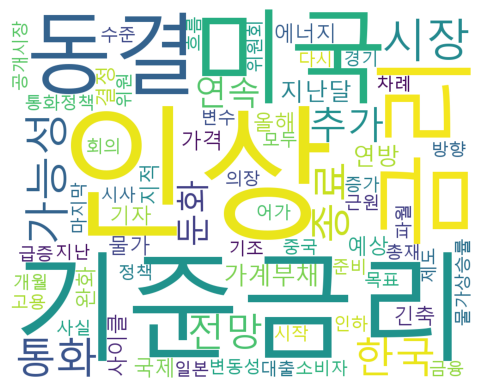

In [12]:
from wordcloud import WordCloud
font_path='c:/Windows/Fonts/malgun.ttf'
wc=WordCloud(width=1000, height=800, background_color='white', font_path=font_path, random_state=0)
plt.imshow(wc.generate_from_frequencies(counter2))
plt.axis('off')
plt.savefig('data/wc1.png')
plt.show()

#### 4. pytagcloud 사용하여 그리기 

[한글서체 등록방법] https://velog.io/@ruinak_4127/PytagCloud

In [13]:
! pip install pygame
! pip install pytagcloud
! pip install simplejson

In [14]:
import pytagcloud
count3=counter.most_common(50)
taglist=pytagcloud.make_tags(count3, maxsize=80)
taglist

[{'color': (216, 99, 19), 'size': 89, 'tag': '인상'},
 {'color': (91, 64, 10), 'size': 75, 'tag': '등'},
 {'color': (127, 150, 42), 'size': 70, 'tag': '기준금리'},
 {'color': (106, 172, 29), 'size': 60, 'tag': '것'},
 {'color': (146, 81, 14), 'size': 55, 'tag': '미국'},
 {'color': (162, 202, 197), 'size': 55, 'tag': '금리'},
 {'color': (70, 193, 149), 'size': 44, 'tag': '동결'},
 {'color': (50, 209, 51), 'size': 44, 'tag': '시장'},
 {'color': (199, 187, 33), 'size': 44, 'tag': '가능성'},
 {'color': (65, 11, 71), 'size': 44, 'tag': '준'},
 {'color': (181, 53, 109), 'size': 38, 'tag': '한국'},
 {'color': (129, 52, 132), 'size': 38, 'tag': '통화'},
 {'color': (57, 201, 189), 'size': 38, 'tag': '종료'},
 {'color': (112, 146, 213), 'size': 38, 'tag': '전망'},
 {'color': (210, 10, 66), 'size': 38, 'tag': '추가'},
 {'color': (167, 192, 162), 'size': 32, 'tag': '연속'},
 {'color': (199, 87, 44), 'size': 32, 'tag': '둔화'},
 {'color': (122, 34, 40), 'size': 32, 'tag': '가계부채'},
 {'color': (126, 25, 87), 'size': 32, 'tag': '로'},


In [15]:
pytagcloud.create_tag_image(taglist, 'data/pycloud1.png', size=(900,800),
                                      fontname='Korean', rectangular=False)